In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-tv-shows-and-movies/NetFlix.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/netflix-tv-shows-and-movies/NetFlix.csv')

# Data first look and preparation

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,05-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,01-Mar-16,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,03-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   int64 
 10  genres        7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(2), object(10)
memory usage: 730.2+ KB


In [6]:
df.isna().sum() / len(df)

show_id         0.000000
type            0.000000
title           0.000000
director        0.306793
cast            0.092205
country         0.065109
date_added      0.001284
release_year    0.000000
rating          0.000899
duration        0.000000
genres          0.000000
description     0.000000
dtype: float64

**What shall we do?**
- fill missing values in columns `director`, `cast`, `country`
- drop missing values in column `date_added` to convert type to datetime
- extract month and day of week

In [7]:
list = ['director', 'cast', 'rating', 'country']
for i in list:
    df[i] = df[i].fillna('unknown')

In [8]:
df = df.dropna()

In [9]:
df['date_added'].str.contains('-').sum()/len(df)

0.9886845827439887

In [10]:
df = df[df['date_added'].str.contains('-')]
df['date_added'] = pd.to_datetime(df['date_added'], format='%d-%b-%y')
df['month_added'] = df['date_added'].dt.month
df['day_added'] = df['date_added'].dt.day_name()

In [11]:
df['genres'].nunique()

487

**Adding column with first genre name from `genres`**

In [12]:
df['main_genre'] = df['genres'].str.split(',', expand=True)[0]

# EDA

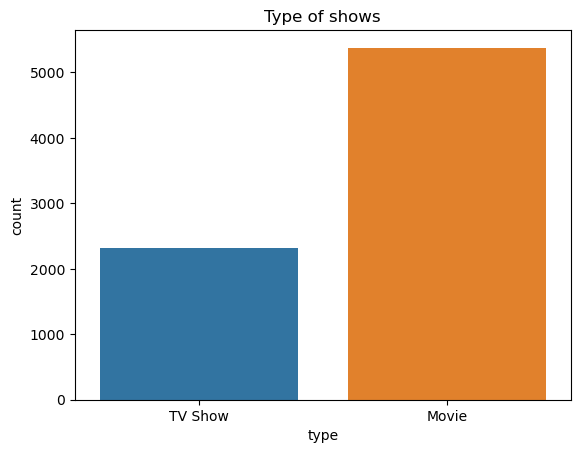

In [13]:
plt.title('Type of shows')
sns.countplot(data=df, x='type');

In [14]:
top_10 = df.groupby('country', as_index=False)[['show_id']] \
        .count().sort_values(by='show_id', ascending=False).head(10)

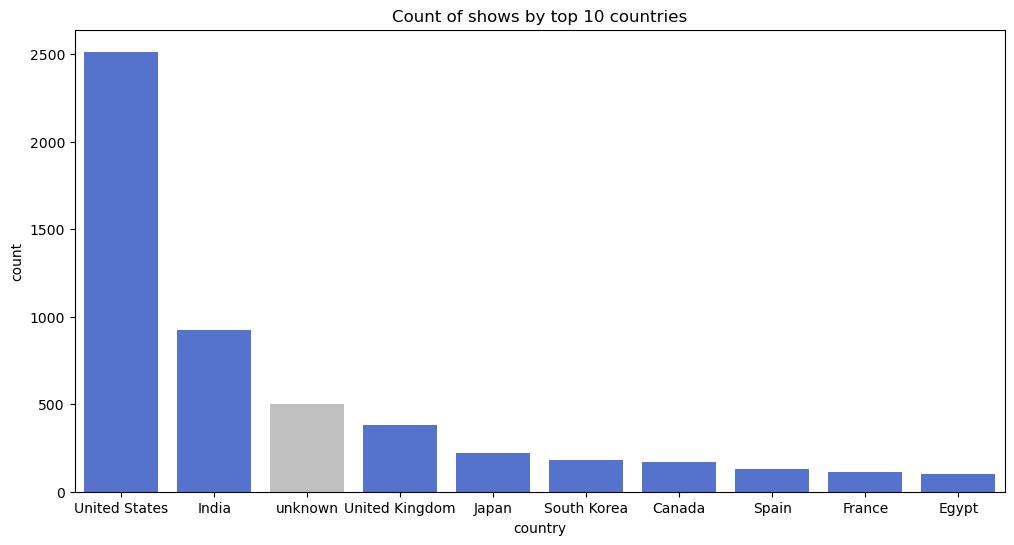

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(top_10, x='country', y='show_id', 
            palette=["royalblue" if x!='unknown' else 'silver' for x in top_10['country']])
plt.title('Count of shows by top 10 countries')
plt.ylabel('count');

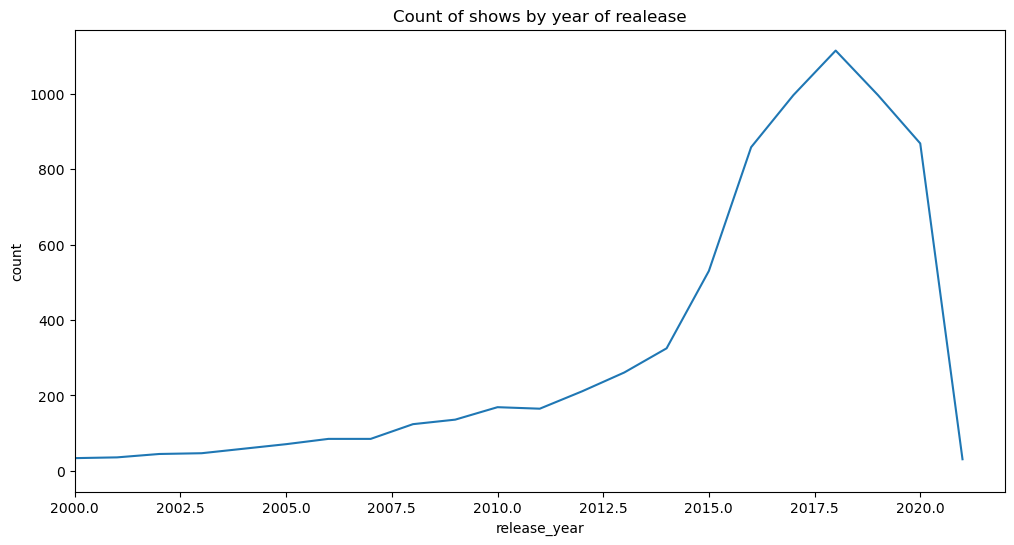

In [16]:
plt.figure(figsize=(12,6))
plt.xlim(2000, 2022)
sns.lineplot(data=df.groupby('release_year', as_index=False)[['show_id']].count(),
             x='release_year', y='show_id')
plt.title('Count of shows by year of realease')
plt.ylabel('count');

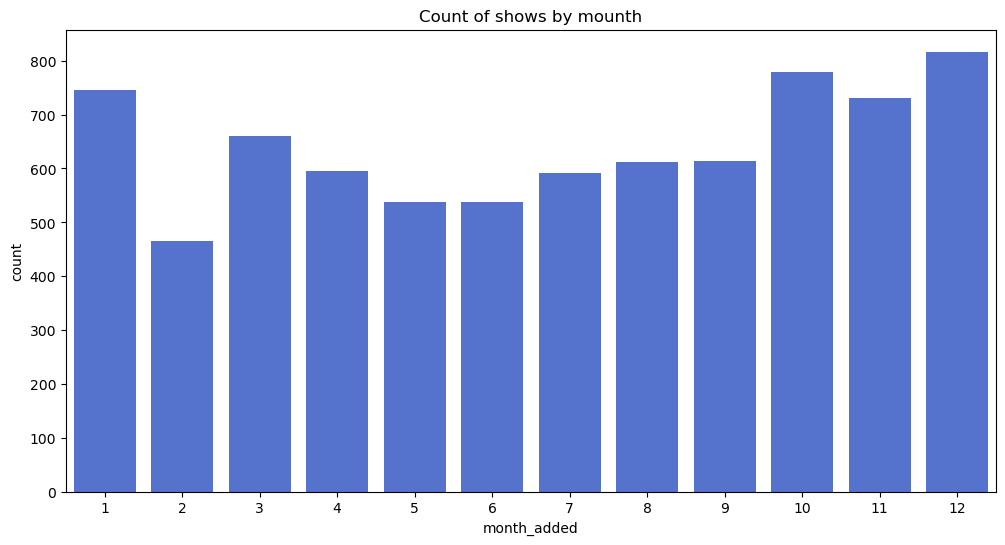

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(data=df.groupby('month_added', as_index=False)[['show_id']].count(),
            x='month_added', y='show_id', color='royalblue')
plt.title('Count of shows by mounth')
plt.ylabel('count');

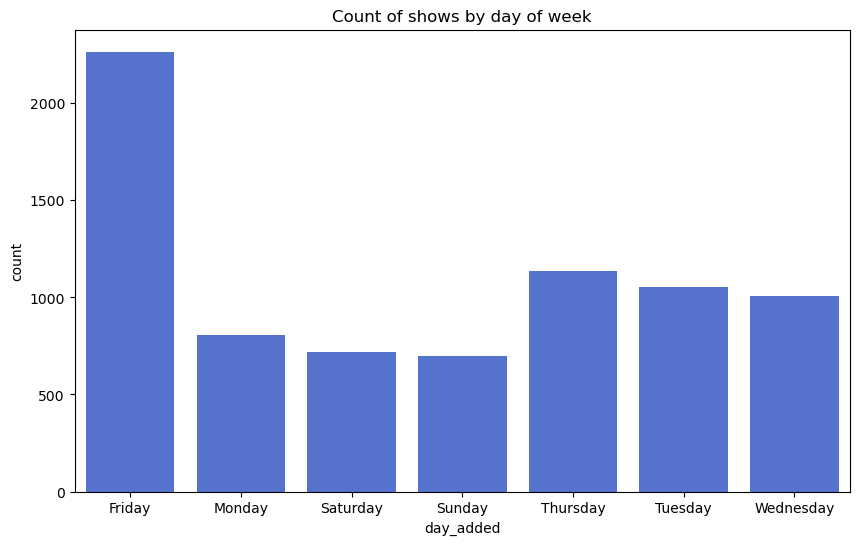

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(data=df.groupby('day_added', as_index=False)[['show_id']].count(),
            x='day_added', y='show_id', color='royalblue')
plt.title('Count of shows by day of week')
plt.ylabel('count');

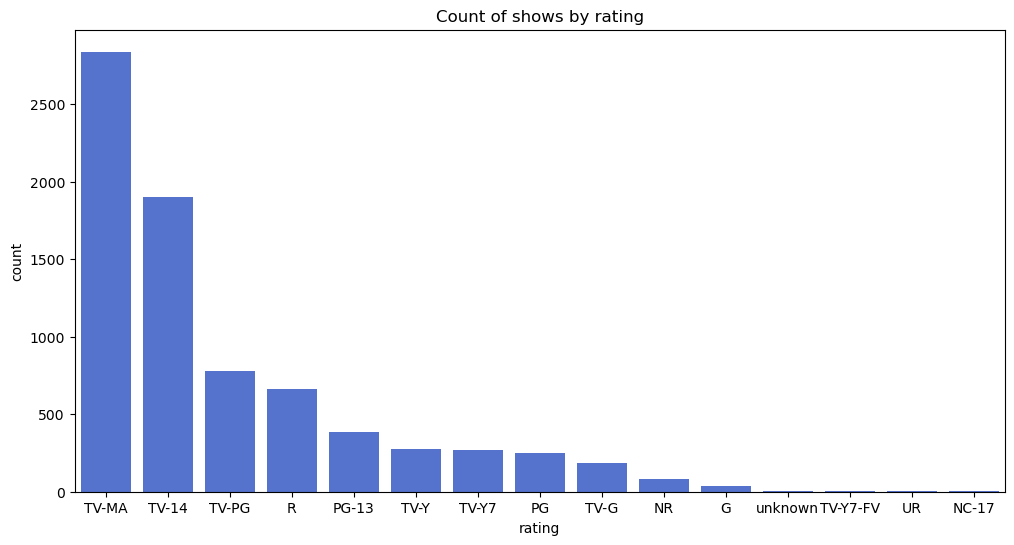

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(data=df.groupby('rating', as_index=False)[['show_id']].count().sort_values(by='show_id',ascending=False),
            x='rating', y='show_id', color='royalblue')
plt.title('Count of shows by rating')
plt.ylabel('count');

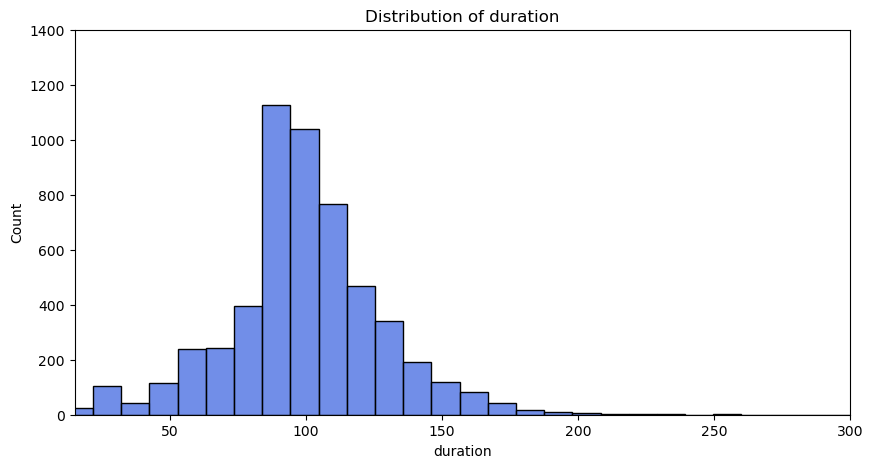

In [20]:
plt.figure(figsize=(10,5))
plt.xlim(15,300)
plt.ylim(0,1400)
plt.title('Distribution of duration')
sns.histplot(df['duration'], color='royalblue');

In [21]:
top_10_genre = df.groupby('main_genre', as_index=False)[['show_id']] \
        .count().sort_values(by='show_id', ascending=False).head(10)

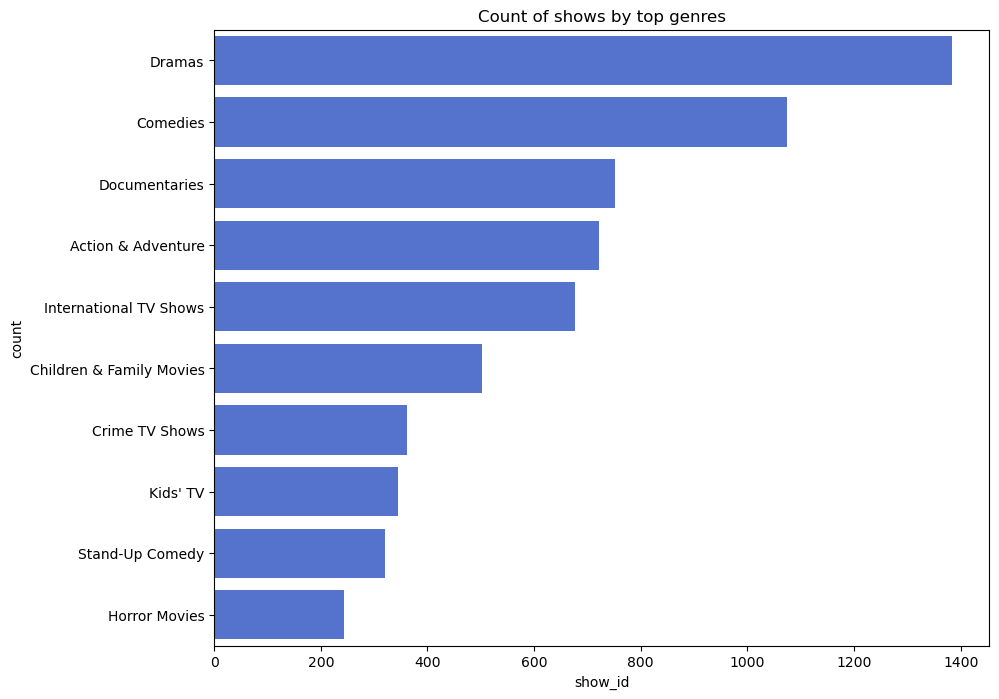

In [22]:
plt.figure(figsize=(10,8))
sns.barplot(top_10_genre, x='show_id', y='main_genre', color='royalblue')
plt.title('Count of shows by top genres')
plt.ylabel('count');